In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from mtcnn import MTCNN

2022-11-29 11:07:54.489656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 11:07:54.779388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kirill/projects_ml/face_rec/workspace/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-29 11:07:54.779421: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 11:07:54.833564: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBL

In [2]:
cv2.__version__

'4.6.0'

In [3]:
path = 'images'
directory = os.listdir(path)
print(directory)


['eva.png', 'sweetie.jpg', 'rem.jpg', 'rem.webp', 'tima.jpg', 'klass.jpg', 'eva.jpg']


In [4]:
path = 'images'
directory = os.listdir(path)
print(directory)

['eva.png', 'sweetie.jpg', 'rem.jpg', 'rem.webp', 'tima.jpg', 'klass.jpg', 'eva.jpg']


In [5]:
detector = MTCNN()

2022-11-29 11:07:56.931635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kirill/projects_ml/face_rec/workspace/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-29 11:07:56.931988: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-29 11:07:56.932021: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kirill-dev): /proc/driver/nvidia/version does not exist
2022-11-29 11:07:56.932737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
video_capture = cv2.VideoCapture(0)  # webcamera

if not video_capture.isOpened():
    print("Unable to access the camera")
else:
    print("Access to the camera was successfully obtained")

print("Streaming started")
while True:
    ret, frame = video_capture.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = detector.detect_faces(rgb)
    for box in results:
        x1, y1, w, h = box['box']
        cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
    else:
        print('Нет лиц на фото!')


    cv2.imshow("Face detector - to quit press ESC", frame)


    key = cv2.waitKey(1)
    if key % 256 == 27:
        break

video_capture.release()
cv2.destroyAllWindows()
print("Streaming ended")

Access to the camera was successfully obtained
Streaming started
1/1 [==============================] - 0s 141ms/step
Нет лиц на фото!


1/1 [==============================] - 0s 30ms/step
Нет лиц на фото!
1/1 [==============================] - 0s 25ms/step
Нет лиц на фото!
1/1 [==============================] - 0s 26ms/step
Нет лиц на фото!
1/1 [==============================] - 0s 28ms/step
Нет лиц на фото!
Streaming ended


In [7]:
ends = ['.jpg', '.png', '.jpeg', '.webp']
photos_rgb = []
photos_crop = []
for file in directory:
    print(file)
    if os.path.splitext(file)[1] in ends:
        img = cv2.imread(f'images/{file}', cv2.IMREAD_ANYCOLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        detector = MTCNN()
        results = detector.detect_faces(img_rgb)
        if len(results) > 0:
            for box in results:
                x1, y1, w, h = box['box']
                cv2.rectangle(img_rgb, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
                img_crop = img_rgb[y1:y1+h, x1: img_rgb.shape[1]-50]
            photos_rgb.append(img_rgb)
            photos_crop.append(img_crop)
        else:
            print('Не обнаружены лица на фото!')
    else:
        raise TypeError('Фотография неверного формата!')

eva.png
1/1 [==============================] - 0s 215ms/step
sweetie.jpg
1/1 [==============================] - 0s 216ms/step
rem.jpg
1/1 [==============================] - 0s 167ms/step
Не обнаружены лица на фото!
rem.webp
1/1 [==============================] - 0s 182ms/step
Не обнаружены лица на фото!
tima.jpg
1/1 [==============================] - 0s 148ms/step
klass.jpg


2022-11-29 11:08:14.858791: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43750960 exceeds 10% of free system memory.
2022-11-29 11:08:14.914824: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43750960 exceeds 10% of free system memory.
2022-11-29 11:08:14.914884: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43750960 exceeds 10% of free system memory.
2022-11-29 11:08:14.999581: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17384640 exceeds 10% of free system memory.
2022-11-29 11:08:15.020478: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17384640 exceeds 10% of free system memory.


5/5 [==============================] - 0s 26ms/step
eva.jpg
1/1 [==============================] - 0s 301ms/step


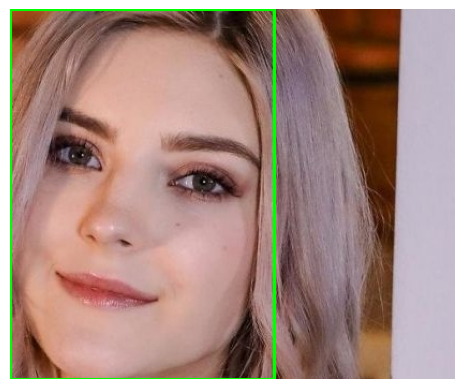

In [14]:
plt.imshow(photos_crop[5])
plt.axis('off');

1/1 [==============================] - 0s 30ms/step


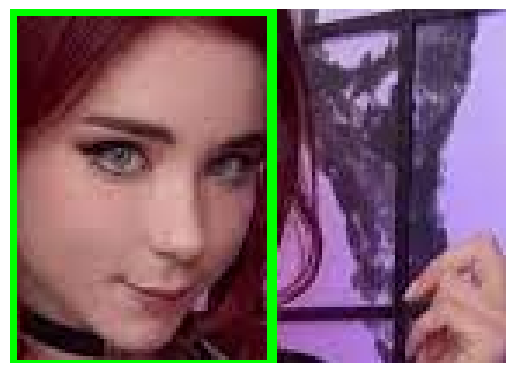

In [9]:
im = cv2.imread('images/sweetie.jpg', cv2.IMREAD_ANYCOLOR)
i1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(i1)
for box in faces:
    x1, y1, w, h = box['box']
    cv2.rectangle(i1, (x1, y1), (x1+w,y1+h), (0,255,0), 2)
    i1 = i1[y1:y1+h, x1: im.shape[1]-50]
plt.imshow(i1)
plt.axis('off');